#                                          **How to Conduct ANOVA Analysis** 
### The main goal of this tutorial is to show the audiences how to conduct statistical analysis such as one-way and two-way ANOVA on a military food waste data set. 


## What's the difference among T-test, One-way, and Two-way ANOVA?
### Theoretically, they are all analysis of variance:

In [4]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://slideplayer.com/slide/5147312/16/images/2/.jpg")

### 1. T-test: helps you compare whether two groups have different average values. 
    For example, We know Manhattan, KS is known as the little apple and Manhattan, NY is the big apple. Let’s say you are curious about whether New Yorkers and Kansans spend a different amount of money per month on movies. It’s impractical to ask every New Yorker and Kansan about their movie spending, so instead you ask a sample of 300 New Yorkers and 300 Kansans and the averages are 14 usd and 18 usd. The t-test asks whether that difference is probably representative of a real difference between Kansans and New Yorkers generally or whether that is most likely a meaningless statistical fluke.
### 2. One-way ANOVA: determine whether there are any statistically significant differences among the means of three or more independent (unrelated) groups.
    Using the example described above. If we not only curious about the different amount of money Kansans and New Yorkers spend on movie, we also want to know people from other states. We will use one way ANOVA to find out the difference among more than two groups. 
### 3. Two-way ANOVA is an extension to one-way ANOVA . There are two independent variables instead of one that were measured among different groups.
    If we continue using the Kansans vs Now Yorkers example, we will meausure not only the amount of money they spend on movies, also we are interested in how their income level affects their spending on movies. Now we have two independent variables: where they come from (Kansas vs New York), and income level. Think about how income level can moderate the relationship between where they come from and the amount of money spend on movies. Now we can have potentially four groups we are comparing means among with two independent variables: 
    
    Group 1: Kansans with low income
    Group 2: Kansans with high income
    Group 3: New Yorkers with low income
    Group 4: New Yorkers with High income
  


In [5]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "http://slideplayer.com/slide/5147312/16/images/5/Analysis+of+Variance+One+way+ANOVA+Factorial+ANOVA.jpg")

### Below is another example.
#### we are interested in looking at how different level of autonomy and amount of trainning affect job performance. The two independent variables are autonomy and training. We can see that when tainning is low and autonomy is high, job performance is the lowest. However, with the amount of training increases, job performance hits the highest when autonoly is high. 

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url= "https://upload.wikimedia.org/wikipedia/commons/c/c1/Two-way_interaction_effect_example.png")

## Now we know the difference among these three tests. Let's see what assumptions need to be met to run the ANOVA analysis. 

### Before you decide to conduct a two-way analysis, make sure you check your data set and see if they meet the following assumptions 

### One-way ANOVA Assumptions

1. Samples are independent.
2. The response variable is approximately normally distributed.
3. The population variances are equal across responses for the group levels (if the largest sample standard deviation divided by the smallest sample standard deviation is not greater than two, then assume that the population variances are equal).
 

### Two-way ANOVA Assumptions

1. The populations from which the samples were obtained must be normally or approximately normally distributed.
2. The samples must be independent.
3. The variances of the populations must be equal.
4. The groups must have the same sample size.

#### You can see that the only difference of assumption between one-way and two-way ANOVA is that two-way ANOVA requires the sample size among all groups to be equal. 

### What does the Null Hypothesis look like?

Given that you are comparing k independent groups, the null and alternative hypotheses will look like such:

H0:μ1=μ2=⋯=μk
Ha: Not all μ⋅ are equal

In other words, the null hypothesis is that at all of the groups' population means are equal.  The alternative is that they are not all equal; there are at least two population means that are not equal to one another.



### Here is a Youtube video that explains the different between a one-way and two-way ANOVA analysis

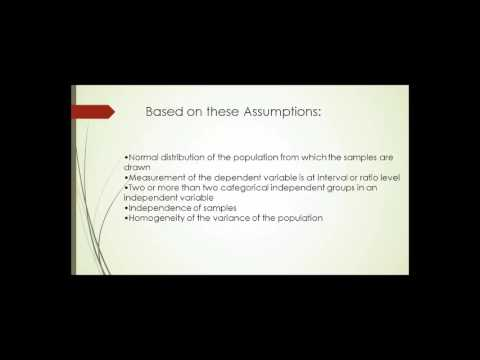

In [7]:
from IPython.display import YouTubeVideo
YouTubeVideo('nvAMVY2cmok')

### There are also websites that offer more explanation and examples: 
1. http://keydifferences.com/difference-between-one-way-and-two-way-anova.html
2. https://statistics.laerd.com/spss-tutorials/two-way-anova-using-spss-statistics.php3. 
3. http://www.statisticshowto.com/anova/

### Now that we have a basic understanding of the AVONA test, let's take a look at the data set. 

We will be using pandas for data cleaning, statsmodels for analysis and seaborn for visualization.

#### Background of the data set:
This data set was collected in order to conduct analysis on Army soldiers' food waste behaviors and its relationship with variables such as hunnger level,gender, appeal of food, taste of food, and amount of food served. **The goal of this study was to study antecedents of food waste behaviros and reduce food waste in the military dininig facilities.** 

**The following description will explain the variables for better understanding:**
**SurveyID:** this was a 4 digit number each participant was assigned to for identification purpose.

**Appeal:** How appealing/appetizing the food looked. From 1 "strongly agree", to 5 "strongly disagree" with 6 being "I do not know".

**Flavor:** Rating from 1 "strongly agree", to 5 "strongly disagree" on the food being flavorful, with 6 being "I do not know".

**Temp:** Rating from 1 "strongly agree", to 5 "strongly disagree" on the temperature being appropriate on the food, with 6 being "I do not know".

**ReturnYN:** Rating from 1 "strongly agree", to 5 "strongly disagree" on "I would willingly return here again to eat a meal", with 6 being "I don't know". 

**Hungerlevel:** Participants were asked to rate their hunger level before meal, from 1 being "the greatest imaginable hunger" to 5 "slightly hungery" and 6 "neither hungry nor full".

**Satiety:** Participants were asked to rate their satisfaction/fullness level after their meal, from 1 being "neither hungry nor full" to 2 "slightly full" and 6 "greatest imaginable fullness".

**Age:** Participants reported their age.

**Sex:** with 1 being male and 2 being female. 

**Amount taken:** this was the total amount of food that were served to the participants. They were recorded in grams. 

**Leftover:** the total amount of food that was left on the plate, which was recorded in grams.

**Consumed:** the total amount of food consumed recorded in grams.

**KCAL:**total amount of calorie consumed of each participant. 

For variables like appeal, flavor, and hunger level, they were reported in a self administered survey from the participants. For variables like AmountTaken, leftover, consumed, and KCAL, they were recorded by observations, in other words, they were recorded by researchers.

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from seaborn.linearmodels import corrplot, symmatplot 
%matplotlib inline 

import sklearn.linear_model as lm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy import stats
from sklearn import linear_model
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import RFE

### Part 1: Data Cleaning 

### Let's take a look at the data and see how many missing values we have.  

In [9]:
df = pd.read_excel('Data/Army.xlsx')
df.head()

,Participants,SurveyID,Appeal,Flavor,Temp,ReturnYN,Hungerlevel,Satiety,Age,Sex,AmountTaken,Leftover,Consumed,KCAL
0,1,0000,5.0,5.0,5.0,5.0,3.0,8.0,21.0,2.0,797,90,657.86,1021.587273
1,2,0007,4.0,4.0,4.0,4.0,NaN,8.0,19.0,1.0,845,261,543.05,1132.714145
2,3,0098,4.0,4.0,4.0,4.0,2.0,8.0,25.0,1.0,679,0,679.00,1147.480000
3,4,0105,4.0,3.0,3.0,4.0,3.0,9.0,24.0,1.0,981,155,767.50,1147.676756
4,5,0110,3.0,1.0,1.0,3.0,5.0,6.0,20.0,1.0,698,84,562.52,864.980000


In [10]:
df.isnull().sum()

Participants      0
SurveyID          0
Appeal           35
Flavor           35
Temp             35
ReturnYN         36
Hungerlevel      29
Satiety          36
Age              34
Sex              34
AmountTaken       0
Leftover          0
Consumed          0
KCAL              0
dtype: int64

#### It seems like we have several columns that are missing a lot of values. Since we need the data set to be complete in all columns, we will drop all the rows that have missing values. After we coduct this step, there will be no missing values as shown below. 


In [11]:
df=df.dropna()

In [12]:
df.isnull().sum()

Participants     0
SurveyID         0
Appeal           0
Flavor           0
Temp             0
ReturnYN         0
Hungerlevel      0
Satiety          0
Age              0
Sex              0
AmountTaken      0
Leftover         0
Consumed         0
KCAL             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96 entries, 0 to 135
Data columns (total 14 columns):
Participants     96 non-null int64
SurveyID         96 non-null object
Appeal           96 non-null float64
Flavor           96 non-null float64
Temp             96 non-null float64
ReturnYN         96 non-null float64
Hungerlevel      96 non-null float64
Satiety          96 non-null float64
Age              96 non-null float64
Sex              96 non-null float64
AmountTaken      96 non-null int64
Leftover         96 non-null int64
Consumed         96 non-null float64
KCAL             96 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 11.2+ KB


#### We will take a look at some of the general information of the data set by using describe(). 

In [14]:
df.describe()

,Participants,Appeal,Flavor,Temp,ReturnYN,Hungerlevel,Satiety,Age,Sex,AmountTaken,Leftover,Consumed,KCAL
count,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000,96.000000
mean,70.593750,3.583333,3.729167,3.989583,3.906250,3.458333,8.447917,25.041667,1.072917,603.385417,103.604167,475.202083,877.315146
std,39.651529,1.193550,0.999781,0.827104,0.974173,1.123122,1.221473,5.991075,0.261365,194.617540,106.166154,191.681380,320.425357
min,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,6.000000,19.000000,1.000000,208.000000,0.000000,110.500000,162.814687
25%,37.750000,3.000000,3.000000,4.000000,3.000000,3.000000,8.000000,21.000000,1.000000,454.500000,0.000000,319.750000,656.161748
50%,70.500000,4.000000,4.000000,4.000000,4.000000,4.000000,8.000000,22.000000,1.000000,590.000000,84.500000,479.235000,853.238992
75%,106.250000,4.250000,4.000000,4.250000,5.000000,4.000000,9.000000,28.000000,1.000000,724.500000,155.000000,608.755000,1105.350637
max,136.000000,5.000000,5.000000,5.000000,5.000000,5.000000,11.000000,43.000000,2.000000,1174.000000,442.000000,1057.000000,1810.000000


In [15]:
df.to_excel("data/dfl.xlsx")

### Part 2: Statistical Analysis

#### Now that we have dropped all of the missing values, we should be able to proceed with the visualization and statistical analysis part with the rest of 96 participants.

### Step 1. Correlation Table and Heatmap

In [16]:
df1 = pd.read_excel('Data/df1.xlsx')
df1.head()

,Participants,SurveyID,Appeal,Flavor,Temp,ReturnYN,Hungerlevel,Satiety,Age,Sex,AmountTaken,Leftover,Consumed,KCAL
0,1,0000,5,5,5,5,1,8,21,1,797,90,657.86,1021.587273
2,3,0098,4,4,4,4,1,8,25,1,679,0,679.00,1147.480000
3,4,0105,4,3,3,4,1,9,24,1,981,155,767.50,1147.676756
4,5,0110,3,1,1,3,1,6,20,1,698,84,562.52,864.980000
10,11,0603,4,4,4,4,1,9,34,1,614,0,614.00,1054.000000


In [17]:
df1.corr()

,Participants,Appeal,Flavor,Temp,ReturnYN,Hungerlevel,Satiety,Age,Sex,AmountTaken,Leftover,Consumed,KCAL
Participants,1.000000,-0.177992,-0.076887,0.009178,-0.094194,0.935767,0.130721,0.086611,0.874383,-0.091222,0.031445,-0.096474,0.034989
Appeal,-0.177992,1.000000,0.751278,0.582017,0.581665,-0.189534,0.259327,0.189407,-0.175466,0.084398,-0.146440,0.152592,0.131136
Flavor,-0.076887,0.751278,1.000000,0.696675,0.557275,-0.135661,0.350351,0.188187,-0.125684,-0.079308,-0.287030,0.082001,0.101568
Temp,0.009178,0.582017,0.696675,1.000000,0.482148,-0.056577,0.296403,0.197646,-0.012660,-0.046077,-0.151810,0.035642,0.028769
ReturnYN,-0.094194,0.581665,0.557275,0.482148,1.000000,-0.050091,0.301047,0.045766,0.010749,0.056102,-0.175726,0.152414,0.074594
Hungerlevel,0.935767,-0.189534,-0.135661,-0.056577,-0.050091,1.000000,0.073958,0.037258,0.884217,-0.067512,0.076251,-0.105058,0.001893
Satiety,0.130721,0.259327,0.350351,0.296403,0.301047,0.073958,1.000000,0.066467,0.060009,0.226336,-0.052435,0.262188,0.274490
Age,0.086611,0.189407,0.188187,0.197646,0.045766,0.037258,0.066467,1.000000,0.024470,0.156567,-0.080752,0.187228,0.188858
Sex,0.874383,-0.175466,-0.125684,-0.012660,0.010749,0.884217,0.060009,0.024470,1.000000,-0.108094,0.062335,-0.130899,-0.003449
AmountTaken,-0.091222,0.084398,-0.079308,-0.046077,0.056102,-0.067512,0.226336,0.156567,-0.108094,1.000000,0.272903,0.825391,0.652396


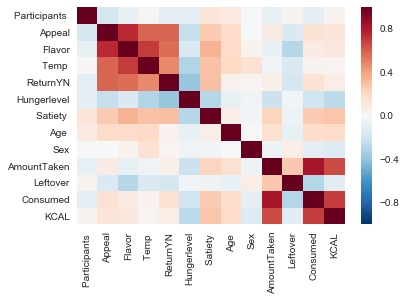

In [18]:
corr=df.corr()
sns.heatmap(corr)

#### From the above table and graph, we can see that leftover food amount is negatively associated with flavor, appeal, temperature, and total amount of food consumed and it positively correlates with amount of food taken. Food flavor negatively associated with amount of food leftover. 
#### We can visualize some of the proposed association and take a look at the pattern. 

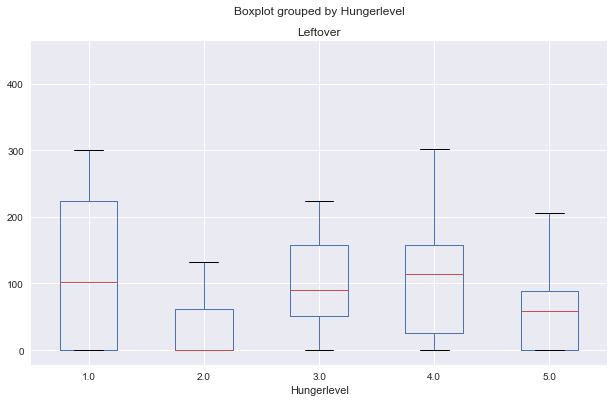

In [50]:
df.boxplot('Leftover', by='Hungerlevel', figsize=(10, 6))

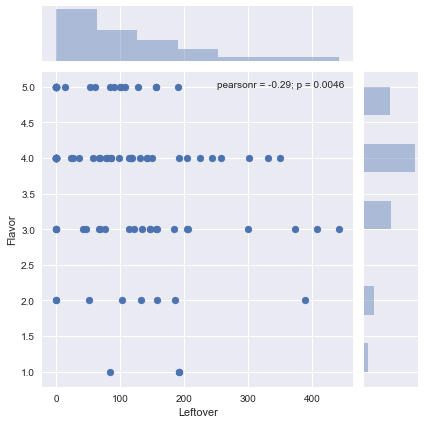

In [51]:
g=sns.jointplot(x="Leftover", y="Flavor", data=df)

#### From this chart, we can see that when flavor level is high, there seemed to be much less leftover food on plate. 

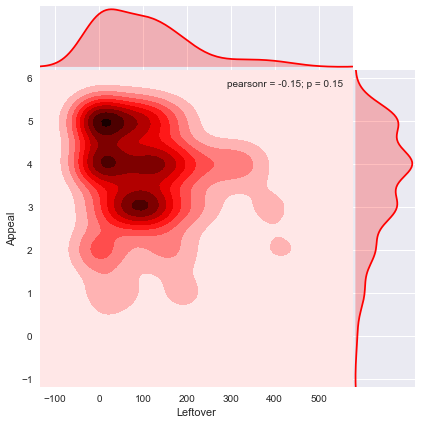

In [52]:
g=sns.jointplot("Leftover", "Appeal", data=df, kind="kde", space=0,color="r")

#### From the chart shown above, we can see that when appeal of food is high, leftover is significantly lower. 

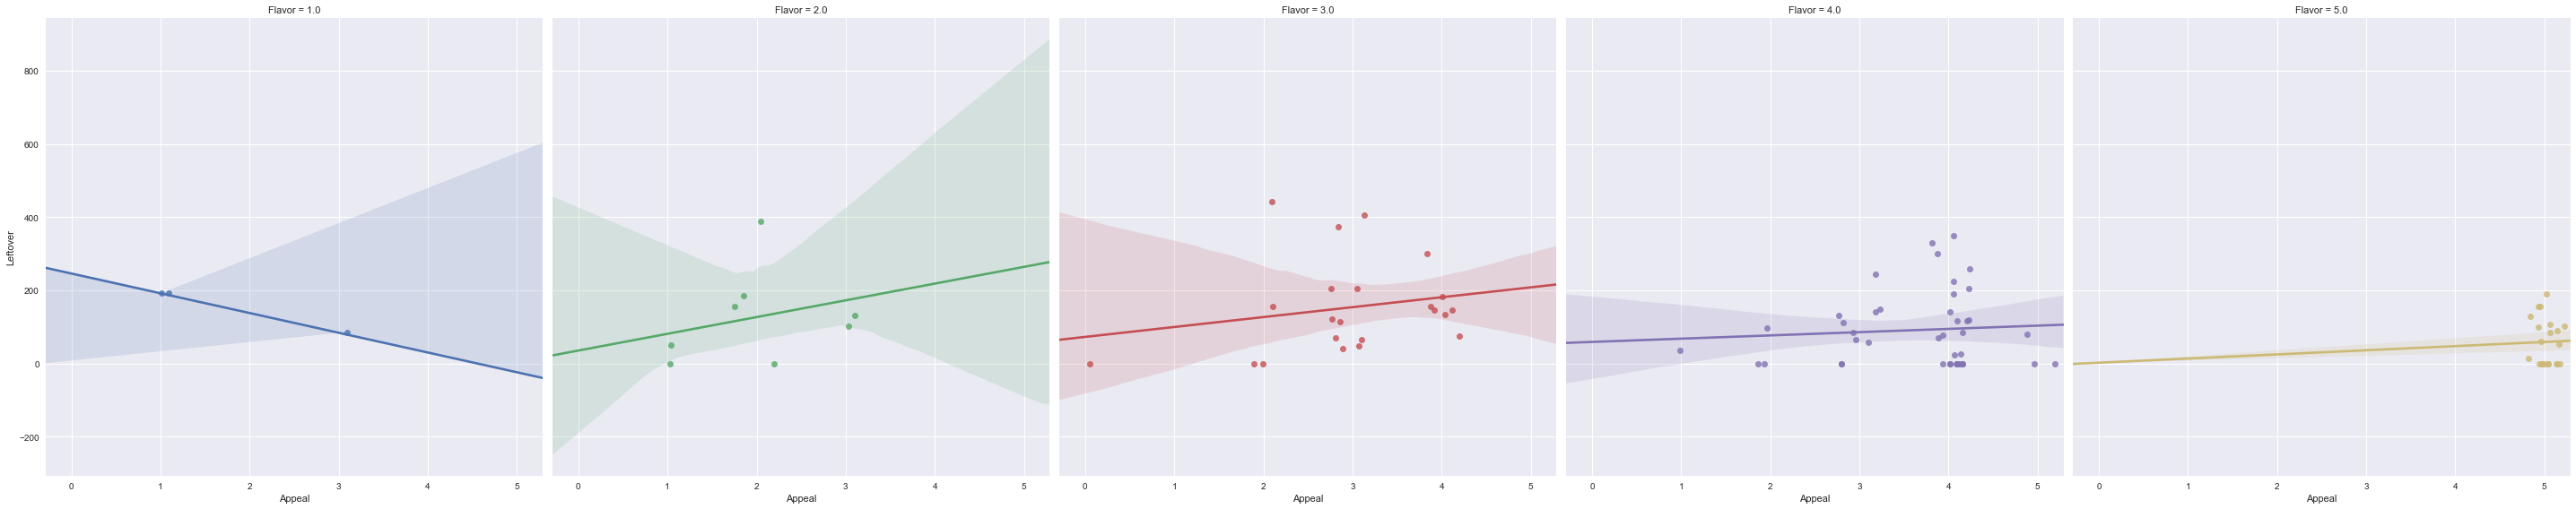

In [53]:
sns.lmplot("Appeal", "Leftover", df, col="Flavor", hue="Flavor", x_jitter=.25, size=8)

#### This chart has given us some very interesting insights into the data:
1. Leftover food waste reaches its peak when food flavor is poor and when it does not look appealing.
2. The slope od food waste decreases when flavor and appeal improve. 
3. When both food appeal and food flavor are high, food waste was the least. 
4. When the food looks good but tastes bad, food wastes increases.
5. When the food looks bad, but taste good, there wasn't as much food waste. 

### Step 2.  After we looked at the correlations among different variables, let's use ANOVA to test differences among different groups. Specifically, let's take a look at how different hunger level influences leftover food on plate. 
#### Remember there are 6 levels of hungerlevel, with 1 being greatest hunger imaginable to 5 slightly hungry and 6 neither hunger nor full. In this specific group, we did not have anyone report 6, therefore, we only have 5 categories. 

### Let's take a look at how hunger level affects food waste using python pakage spm1d  for one-way AVOVA analysis:
Empirical finding: studies have shown that the hungrier a person feels, the more food they tend to take. By taking more food than what they can finish might lead to higher food waste. 

In [19]:
import spm1d 
import numpy as np

In [20]:
np_leftover =np.array(df1["Leftover"])

In [21]:
np_hungerlevel =np.array(df1["Hungerlevel"])

In [22]:
F  = spm1d.stats.anova1(np_leftover, np_hungerlevel, equal_var=False)
F

C:\Users\wenha\Anaconda2\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

  """Entry point for launching an IPython kernel.


SPM{F} (0D)
   SPM.effect   :  Main A
   SPM.SS       : (62854.0211039, 1007914.93723)
   SPM.df       : (1.90606146974, 88.8957944619)
   SPM.MS       : (31427.0105519, 10837.795024)
   SPM.z        :  2.89976


In [23]:
Fi = F.inference(alpha=0.05)
Fi

SPM{F} (0D) inference
   SPM.effect   :  Main A
   SPM.SS       : (62854.0211039, 1007914.93723)
   SPM.df       : (1.90606146974, 88.8957944619)
   SPM.MS       : (31427.0105519, 10837.795024)
   SPM.z        :  2.89976
Inference:
   SPM.alpha    :  0.050
   SPM.zstar    :  3.15069
   SPM.h0reject :  False
   SPM.p        :  0.06277


### Remember our null hypthesis is people from different group of hunger level do not have a difference among food waste. 
#### From the result table above, we can see that under Horeject, it shows False, which means we fail to reject Ho. This means there isn't much of a difference on food waste among different groups of people on huger level. 

### Here is another way to conduct ANOVA by using statesmodel:

In [24]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

In [25]:
Gre = df[df['Hungerlevel'] == 1]['Leftover']
Exe = df[df['Hungerlevel'] == 2]['Leftover']
Ver = df[df['Hungerlevel'] == 3]['Leftover']
Mod = df[df['Hungerlevel'] == 4]['Leftover']
Sli = df[df['Hungerlevel'] == 5]['Leftover']

f_val, p_val = stats.f_oneway(Gre, Exe, Ver, Mod, Sli)  
  
print "One-way ANOVA P =", p_val  

One-way ANOVA P = 0.126333203159


In [26]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

mod = ols('Leftover ~ Hungerlevel', data=df1).fit()
                
aov_table = sm.stats.anova_lm(mod)
print aov_table

C:\Users\wenha\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


               df        sum_sq       mean_sq         F    PR(>F)
Hungerlevel   1.0  6.225743e+03   6225.743028  0.549738  0.460273
Residual     94.0  1.064543e+06  11324.927822       NaN       NaN


C:\Users\wenha\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
C:\Users\wenha\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
C:\Users\wenha\Anaconda2\lib\site-packages\scipy\stats\_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


In [27]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

print pairwise_tukeyhsd(df1['Leftover'], df['Hungerlevel'])

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper   reject
------------------------------------------------
 1.0    2.0   -68.0649 -208.4448  72.315  False 
 1.0    3.0    0.2514  -123.9052 124.4081 False 
 1.0    4.0    0.3012  -119.3703 119.9726 False 
 1.0    5.0   -61.2411 -192.8147 70.3326  False 
 2.0    3.0   68.3164   -36.7343 173.3671 False 
 2.0    4.0   68.3661   -31.3436 168.0758 False 
 2.0    5.0    6.8239  -106.8969 120.5446 False 
 3.0    4.0    0.0497   -75.1193 75.2188  False 
 3.0    5.0   -61.4925 -154.4482 31.4632  False 
 4.0    5.0   -61.5422 -148.4165  25.332  False 
------------------------------------------------


#### As we can see from the ANOVA table above, p value is greater than .05 (p = 0.126), which means we fail to reject Ho (Ho: there is no difference on amount of food left over based on different hunger level). We can also interpret the result by looking at the reject column. When it indicates false, it means we fail to reject Ho.


### Step 3. What about adding gender to the picture along with hungerlevel? Two-way ANOVA.
#### Would gender play a difference on moderating the relaitonship between hunger level and food left on plate?

In [28]:
formula = 'Leftover ~ C(Sex) + C(Hungerlevel) + C(Sex):C(Hungerlevel)'
model = ols(formula, df1).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                             sum_sq    df             F    PR(>F)
C(Sex)                -3.023552e-12   1.0 -2.784256e-16  1.000000
C(Hungerlevel)         4.619521e+04   2.0  2.126957e+00  0.125024
C(Sex):C(Hungerlevel)  1.772564e+04   2.0  8.161383e-01  0.445311
Residual               9.990704e+05  92.0           NaN       NaN


### We can see that the interaction terms of sex and hungerlevel is not significant (third line) from the above table.Therefore, we conclude that gender does not moderate the effect between hunger level and leftover food on plate. 